In [1]:
import pandas as pd

In [2]:
import numpy as np

data = pd.read_csv("./heart_disease.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# data preprocessing

In [3]:
#check for the percentage of null values
for column in data:
    print(column, data[column].isnull().sum() / len(data) * 100)

age 0.0
sex 0.0
cp 0.0
trestbps 0.0
chol 0.0
fbs 0.0
restecg 0.0
thalach 0.0
exang 0.0
oldpeak 0.0
slope 0.0
ca 0.0
thal 0.0
target 0.0


# visualization

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

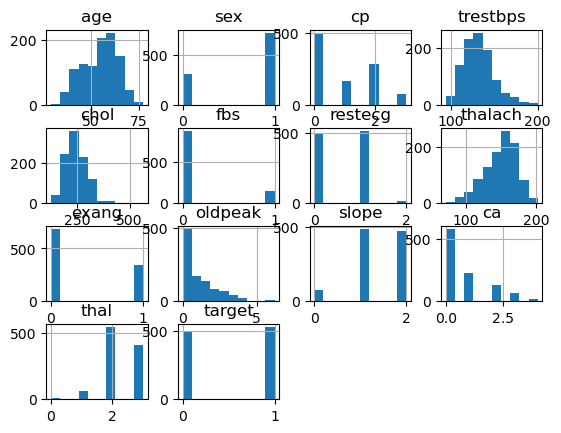

In [4]:
#no null values
#visualize the data

data.hist()

<AxesSubplot:>

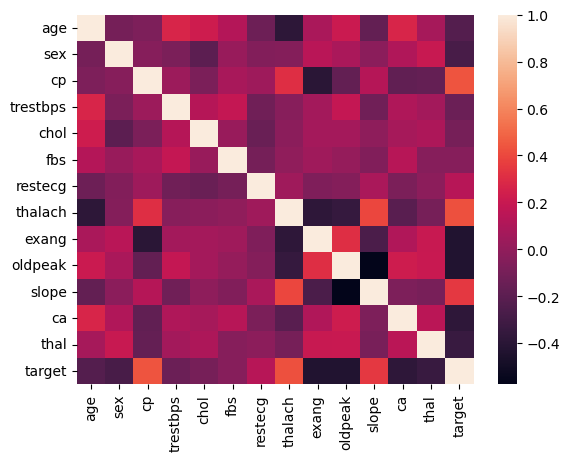

In [10]:
import seaborn as sns
corr = data.corr()

sns.heatmap(corr)

# seperate x data from y data

In [8]:
#split the y-data and the test data

yData = data['target']
xData = data.drop("target", axis = 1)

xData.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [9]:
yData.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

#  Scale the dataset

In [11]:
#scale the x-data using the standard scaler library

from sklearn.preprocessing import StandardScaler


In [12]:
scaler = StandardScaler().fit(xData)

In [13]:
x_scaled = scaler.transform(xData)
x_scaled[:10]

array([[-0.26843658,  0.66150409, -0.91575542, -0.37763552, -0.65933209,
        -0.41887792,  0.89125488,  0.82132052, -0.71228712, -0.06088839,
         0.99543334,  1.20922066,  1.08985168],
       [-0.15815703,  0.66150409, -0.91575542,  0.4791073 , -0.83386117,
         2.38733039, -1.00404855,  0.2559679 ,  1.40392824,  1.72713707,
        -2.24367514, -0.73197147,  1.08985168],
       [ 1.71659547,  0.66150409, -0.91575542,  0.76468824, -1.39623266,
        -0.41887792,  0.89125488, -1.04869198,  1.40392824,  1.30141672,
        -2.24367514, -0.73197147,  1.08985168],
       [ 0.72407944,  0.66150409, -0.91575542,  0.93603681, -0.83386117,
        -0.41887792,  0.89125488,  0.51689988, -0.71228712, -0.91232909,
         0.99543334,  0.23862459,  1.08985168],
       [ 0.834359  , -1.51170646, -0.91575542,  0.36487493,  0.93082177,
         2.38733039,  0.89125488, -1.87497657, -0.71228712,  0.70540823,
        -0.6241209 ,  2.17981673, -0.52212231],
       [ 0.39324077, -1.511706

# Train Test Split

In [14]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(x_scaled, yData, stratify=yData, shuffle=True)

Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((768, 13), (257, 13), (768,), (257,))

# Model training

# Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [16]:
lr.fit(Xtrain, ytrain)

LogisticRegression()

In [19]:
#Evaluation
from sklearn.metrics import accuracy_score, f1_score, precision_score, confusion_matrix, recall_score

def compute_metrics(pred, actual):
    print("accuracy score -> ", accuracy_score(actual, pred))
    print("precision score -> ", precision_score(actual, pred))
    print("recall score -> ", recall_score(actual, pred))
    print("f1 score ->", f1_score(actual, pred))
    print("confusion matrix -> \n", confusion_matrix(actual, pred))

In [20]:
compute_metrics(lr.predict(Xtrain), ytrain) #test on the training set

accuracy score ->  0.8541666666666666
precision score ->  0.8294392523364486
recall score ->  0.9010152284263959
f1 score -> 0.8637469586374695
confusion matrix -> 
 [[301  73]
 [ 39 355]]


In [21]:
compute_metrics(lr.predict(Xtest), ytest)

accuracy score ->  0.8638132295719845
precision score ->  0.8489208633093526
recall score ->  0.8939393939393939
f1 score -> 0.8708487084870848
confusion matrix -> 
 [[104  21]
 [ 14 118]]


# KNN Classifier

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
knn = KNeighborsClassifier(n_neighbors= 3)

In [24]:
knn.fit(Xtrain, ytrain)

KNeighborsClassifier(n_neighbors=3)

In [25]:
compute_metrics(knn.predict(Xtrain), ytrain)

c:\Users\dex\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


accuracy score ->  0.9947916666666666
precision score ->  0.9974489795918368
recall score ->  0.9923857868020305
f1 score -> 0.994910941475827
confusion matrix -> 
 [[373   1]
 [  3 391]]


In [26]:
compute_metrics(knn.predict(Xtest), ytest)

accuracy score ->  0.9688715953307393
precision score ->  0.984375
recall score ->  0.9545454545454546
f1 score -> 0.9692307692307692
confusion matrix -> 
 [[123   2]
 [  6 126]]


c:\Users\dex\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [ ]:
#Its accuracy is better than that for logisitic Regression

# SVMs

In [27]:
from sklearn.svm import SVC

In [28]:
svc = SVC()

In [29]:
svc.fit(Xtrain, ytrain)

SVC()

In [30]:
compute_metrics(svc.predict(Xtrain), ytrain)

accuracy score ->  0.9557291666666666
precision score ->  0.95
recall score ->  0.9644670050761421
f1 score -> 0.9571788413098236
confusion matrix -> 
 [[354  20]
 [ 14 380]]


In [31]:
compute_metrics(svc.predict(Xtest), ytest)

accuracy score ->  0.9299610894941635
precision score ->  0.9191176470588235
recall score ->  0.946969696969697
f1 score -> 0.9328358208955223
confusion matrix -> 
 [[114  11]
 [  7 125]]


# Naive Bayes

In [32]:
from sklearn.naive_bayes import GaussianNB

In [33]:
nb = GaussianNB()

nb.fit(Xtrain,ytrain)

GaussianNB()

In [34]:
compute_metrics(nb.predict(Xtrain), ytrain)

accuracy score ->  0.8268229166666666
precision score ->  0.8129496402877698
recall score ->  0.8604060913705583
f1 score -> 0.8360049321824908
confusion matrix -> 
 [[296  78]
 [ 55 339]]


In [35]:
compute_metrics(nb.predict(Xtest), ytest)

accuracy score ->  0.8404669260700389
precision score ->  0.8181818181818182
recall score ->  0.8863636363636364
f1 score -> 0.850909090909091
confusion matrix -> 
 [[ 99  26]
 [ 15 117]]


# Decision Tree

In [36]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()

tree.fit(Xtrain, ytrain)

DecisionTreeClassifier()

In [37]:
compute_metrics(tree.predict(Xtrain), ytrain)

accuracy score ->  1.0
precision score ->  1.0
recall score ->  1.0
f1 score -> 1.0
confusion matrix -> 
 [[374   0]
 [  0 394]]


In [38]:
compute_metrics(tree.predict(Xtest), ytest)

accuracy score ->  1.0
precision score ->  1.0
recall score ->  1.0
f1 score -> 1.0
confusion matrix -> 
 [[125   0]
 [  0 132]]


In [ ]:
# Decision Tree return 100 % Accuracy WOW

# Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()

forest.fit(Xtrain, ytrain)

RandomForestClassifier()

In [40]:
compute_metrics(forest.predict(Xtrain), ytrain)

accuracy score ->  1.0
precision score ->  1.0
recall score ->  1.0
f1 score -> 1.0
confusion matrix -> 
 [[374   0]
 [  0 394]]


In [41]:
compute_metrics(forest.predict(Xtest), ytest)

accuracy score ->  1.0
precision score ->  1.0
recall score ->  1.0
f1 score -> 1.0
confusion matrix -> 
 [[125   0]
 [  0 132]]


In [ ]:
# Also 100% accuracy wow

# Finally the tree models are the best, both returned 100 % acc. the worst models were the Naive Bayes plus the Logisitic Regeression Models,Though There accuracy can most likely be improved through the use of hyper parameter Tuning